<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/AED_Dataset_RH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados do Dataset 'dadosRH'

# Importando pacotes Básicos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carregando o arquivo dadosRH.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bases_DS/dadosRH.csv")

# ANÁLISE EXPLORATÓRIOA DOS DADOS

Conhecendo os dados

In [ ]:
df.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [ ]:
df.describe()

,id_funcionario,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  int64  
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             52399 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    50684 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


Tratamento dos dados

Alterando o tipo de dado da coluna 'id_funcionario' de 'int' para 'str'

In [ ]:
df['id_funcionario'] = df['id_funcionario'].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  object 
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             52399 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    50684 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 4.6+ MB


# Verificando dados faltantes

In [ ]:
df.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

Tratando dados faltantes na coluna 'educacao' utilizando a moda

In [ ]:
df['educacao'].mode()

0    Superior
dtype: object

In [ ]:
df['educacao'].fillna(df['educacao'].mode()[0], inplace=True)

In [ ]:
df.educacao.value_counts()

Superior                 39078
Mestrado ou Doutorado    14925
Ensino Medio               805
Name: educacao, dtype: int64

# Tratando dados faltantes na coluna 'aval_ano_anterior' utilizando a mediana

In [ ]:
df['aval_ano_anterior'].isnull().sum()

4124

In [ ]:
df['aval_ano_anterior'] = df['aval_ano_anterior'].fillna(0)

In [ ]:
df['aval_ano_anterior'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: aval_ano_anterior, dtype: int64

In [ ]:
df.loc[df['aval_ano_anterior'] == 0, 'aval_ano_anterior'] = 3.0

In [ ]:
df.aval_ano_anterior.value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: aval_ano_anterior, dtype: int64

# Visualizando os dados

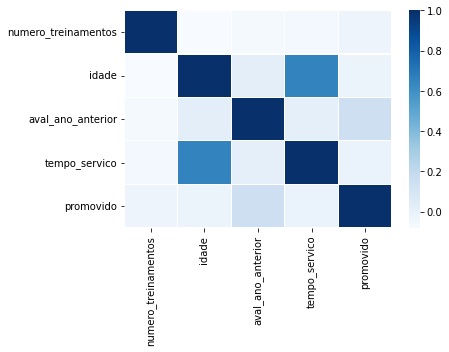

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues', linewidths=0.1)

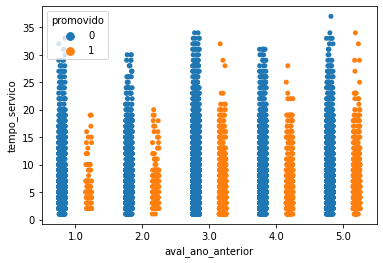

In [ ]:
sns.stripplot(x='aval_ano_anterior', y='tempo_servico', hue='promovido', data=df, split=True)

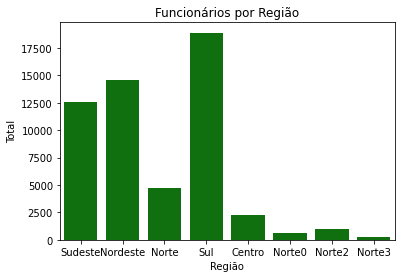

In [ ]:
sns.countplot(df['regiao'], color='green')
plt.xlabel('Região')
plt.ylabel('Total')
plt.title('Funcionários por Região')
plt.show()

Text(0.5, 1.0, 'Funcionarios por canal de recrutamento')

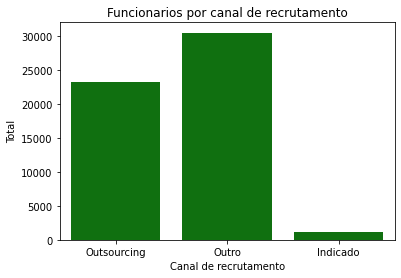

In [ ]:
sns.countplot(df['canal_recrutamento'], color='green')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Total')
plt.title('Funcionarios por canal de recrutamento')


In [ ]:
tab1 = pd.crosstab(df['regiao'], df['genero'])

Text(0.5, 0, 'Regiao')

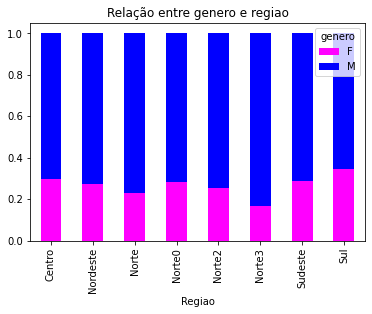

In [ ]:
tab1.div(tab1.sum(1).astype(float), axis=0).plot(kind='bar',
                                                stacked=True,
                                                color=['magenta', 'blue'])
plt.title('Relação entre genero e regiao')
plt.xlabel('Regiao')

In [ ]:
tab2 = pd.crosstab(df['educacao'], df['genero'])

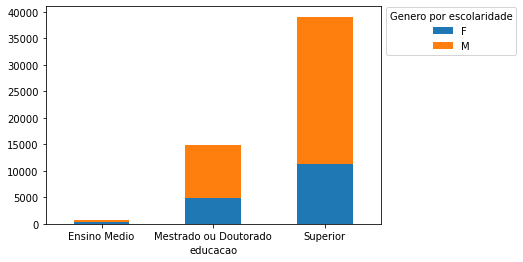

In [ ]:
ax = tab2.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Genero por escolaridade', bbox_to_anchor=(1, 1.02), loc='upper left')


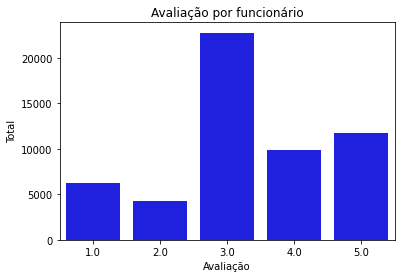

In [ ]:
sns.countplot(df['aval_ano_anterior'], color='blue')
plt.title('Avaliação por funcionário')
plt.xlabel('Avaliação')
plt.ylabel('Total')
plt.show()

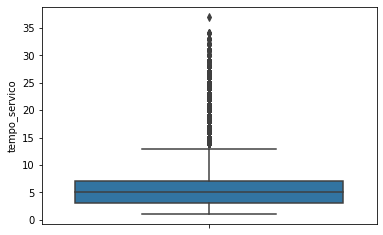

In [ ]:
sns.boxplot(y='tempo_servico', data=df)

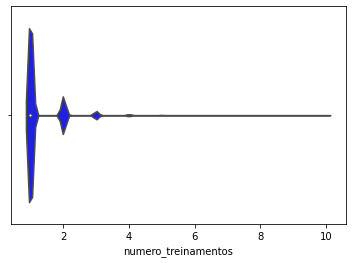

In [ ]:
sns.violinplot(df['numero_treinamentos'], color='blue')

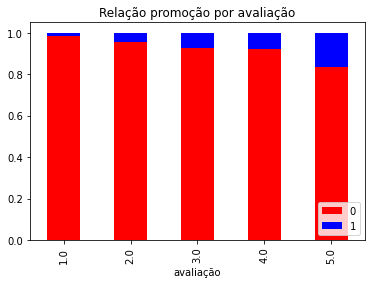

In [ ]:
tab3 = pd.crosstab(df['aval_ano_anterior'], df['promovido'])
tab3.div(tab3.sum(1).astype(float), axis=0).plot(kind='bar',
                                                stacked=True,
                                                color=['red', 'blue'])
plt.title('Relação promoção por avaliação')
plt.xlabel('avaliação')
plt.legend(loc='lower right')

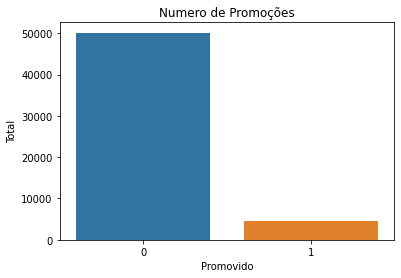

In [ ]:
sns.countplot(df['promovido'])
plt.title('Numero de Promoções')
plt.xlabel('Promovido')
plt.ylabel('Total')
plt.show()

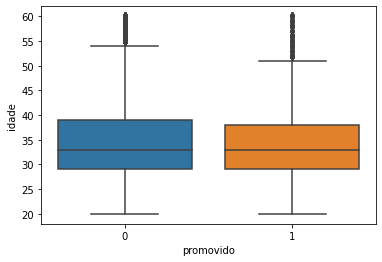

In [ ]:
sns.boxplot(x = 'promovido', y = 'idade', data = df)

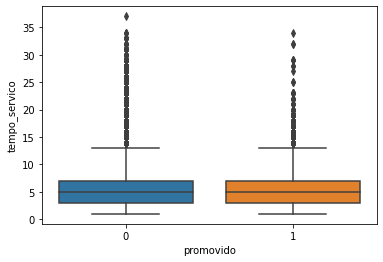

In [ ]:
sns.boxplot(x = 'promovido', y = 'tempo_servico', data = df)

In [ ]:
tab4 = pd.crosstab(df['educacao'], df['promovido'])

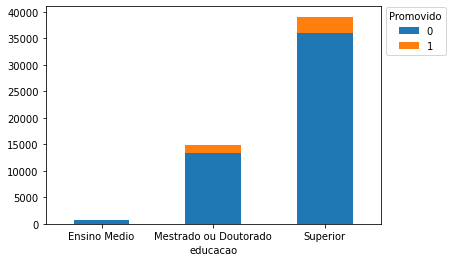

In [ ]:
ay = tab4.plot(kind='bar', stacked=True, rot=0)
ay.legend(title='Promovido', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
tab5 = pd.crosstab(df['canal_recrutamento'], df['promovido'])

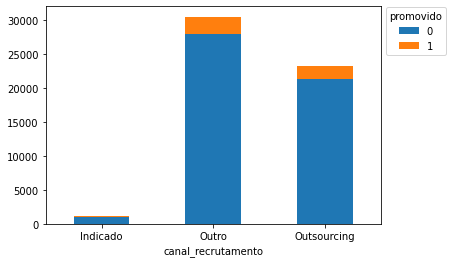

In [ ]:
az = tab5.plot(kind='bar', stacked=True, rot=0)
az.legend(title='promovido', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
tab6 = pd.crosstab(df['departmento'], df['promovido'])

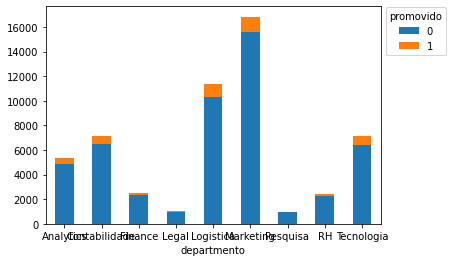

In [ ]:
axy = tab6.plot(kind='bar', stacked=True, rot=0)
axy.legend(title='promovido', bbox_to_anchor=(1, 1.02), loc='upper left')

# PREPARANDO OS DADOS PRO  MODELO DE ML

Transformando variáveis categóricas em numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  object 
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             54808 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    54808 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 4.6+ MB


In [ ]:
df['departmento'].value_counts()

Marketing        16840
Logistica        11348
Tecnologia        7138
Contabilidade     7138
Analytics         5352
Finance           2536
RH                2418
Legal             1039
Pesquisa           999
Name: departmento, dtype: int64

In [ ]:
df['departmento'] = df['departmento'].map({'Marketing': 0, 'Logistica': 1, 'Tecnologia': 2, 'Contabilidade': 3, 'Analytics': 4,
                                         'Finance': 5, 'RH': 6, 'Legal': 7, 'Pesquisa': 8})
df['regiao'] = df['regiao'].map({'Sul': 0, 'Nordeste': 1, 'Sudeste': 2, 'Norte': 3, 'Centro': 4, 'Norte2': 5, 'Norte0': 6,
                                'Norte3': 7})
df['educacao'] = df['educacao'].map({'Superior': 0, 'Mestrado ou Doutorado': 1, 'Ensino Medio': 2})
df['genero'] = df['genero'].map({'M': 0, 'F': 1})
df['canal_recrutamento'] = df['canal_recrutamento'].map({'Outro': 0, 'Outsourcing': 1, 'Indicado': 2})

In [ ]:
df.set_index('id_funcionario')

,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
id_funcionario,,,,,,,,,,
65438,0,2,1,1,1,1,35,5.0,8,0
65141,1,1,0,0,0,1,30,5.0,4,0
7513,0,2,0,0,1,1,34,3.0,7,0
2542,0,3,0,0,0,2,39,1.0,10,0
48945,2,1,0,0,0,1,45,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...
3030,2,2,0,0,1,1,48,3.0,17,0
74592,1,1,1,1,0,1,37,2.0,6,0
13918,4,2,0,0,0,1,27,5.0,3,0


Separar dados e suas classes

In [ ]:
X = df.drop(['id_funcionario', 'promovido'], axis=1)

In [ ]:
y = df.promovido

# Separa dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Executando um Algoritmo Classificador

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear')

# Treinando o Algoritmo

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Coloca as Classificações na Variável y_pred

In [ ]:
y_pred = lr.predict(X_test)

Checa a Acurácia do Modelo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.9171683999270206

# Relatório de Classificação

Recall

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

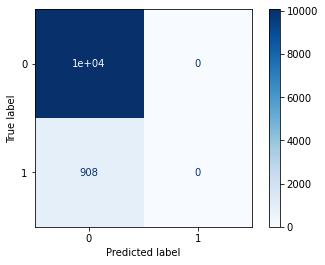

In [ ]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

# Aplicando SMOTE para balancear os dados

In [ ]:
import numpy as np

In [ ]:
np.bincount(y)

array([50140,  4668])

Iniciando SMOTE

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=42)

In [ ]:
X_smt, y_smt = smt.fit_resample(X, y)

In [ ]:
np.bincount(y_smt)

array([50140, 50140])

# Separando Treino e Teste

# Separa em 80% dos dados para treino e 20% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size= 0.20, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Coloca as classificações na variável y_pred

In [ ]:
y_pred_smt = lr.predict(X_test)

# Checa a acurácia do modelo

In [ ]:
accuracy_score(y_test, y_pred_smt)

0.6607997606701237

In [ ]:
print(classification_report(y_test, y_pred_smt))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66     10197
           1       0.65      0.69      0.67      9859

    accuracy                           0.66     20056
   macro avg       0.66      0.66      0.66     20056
weighted avg       0.66      0.66      0.66     20056



# MATRIZ DE CONFUSÃO

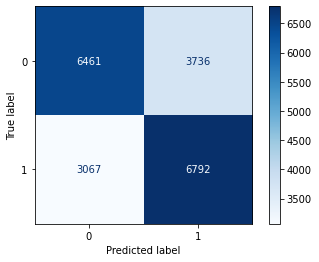

In [ ]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
y_pred_prob_smt = lr.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_smt)
auc = roc_auc_score(y_test, y_pred_prob_smt)

# ROC CURVE

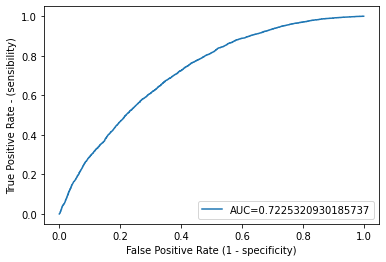

In [ ]:
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.ylabel('True Positive Rate - (sensibility)')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.legend(loc=4)

In [ ]:
# Define a função que aceita o limiar e imprime a sensibilidade e especificidade
def evaluate_threshold(threshold):
    print('Sensibilidade:', tpr[thresholds > threshold][-1])
    print('Especificidade:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

Sensibilidade: 0.6889136829293032
Especificidade: 0.6336177307051094


In [ ]:
# Calcular cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring='roc_auc').mean()

0.660994292077431

# Ao final da análise do arquivo contendo dados do RH sobre a promoção dos funcionários, conclui que:

# Previsões

Previsão de um profissional de marketing da região sul, com mestrado ou doutorado, do sexo masculino, tendo sido contratado
po indicação e tendo feito apenas um treinamento, com idade de 33 anos, avaliação 3 no ano anterior e com cinco anos de empresa
ser promovido.

In [ ]:
prev1 = pd.DataFrame({'departmento': 0, 'regiao': 0, 'educacao': 1, 'genero': 0, 'Indicado': 2, 'numero_treinamento': 1, 'idade': 33,
'aval_ano_anterior': 3, 'tempo_servico':5}, index=[0])

In [ ]:
prob1 = lr.predict_proba(prev1)

In [ ]:
print('{}'.format(round(prob1[:,1][0]*100,2)))

33.97


Previsão de um profissional de logística da região nordeste, com diploma de curso superior, do sexo masculino, tendo sido contratado por outsourcing e tendo feito apenas um treinamento, com idade de 39 anos, avaliação 4 no ano anterior e com dez anos de empresa ser promovido.

In [ ]:
prev2 = pd.DataFrame({'departmento': 1, 'regiao': 2, 'educacao': 0, 'genero': 0, 'Indicado': 1, 'numero_treinamento': 1, 'idade': 3,
'aval_ano_anterior': 4, 'tempo_servico':10}, index=[0])

In [ ]:
prob2 = lr.predict_proba(prev2)

In [ ]:
print('{}'.format(round(prob2[:,1][0]*100,2)))

69.1
